In [129]:
import pandas as pd
import numpy as np

In [130]:
# dsets = ['income', 'compas', 'german']

# for d in dsets:
#     df = pd.read_csv(d + '_experiment_mean.csv')
#     dp_df = pd.read_csv(d + '_experiment_mean_dp.csv')
#     df['e'] = np.nan
#     dp_df.rename(columns={'t':'tau'}, inplace=True)
#     new_df = pd.concat([df, dp_df]).reset_index(drop=True)
#     new_df.drop(['kf', 'lf'], axis=1, inplace=True)
#     for p in ['k', 'u', 'f']:
#         new_df[p].replace(0, np.nan, inplace=True)
#     new_df.rename(columns={'m': 'micro_agg',
#                            'e': 'epsilon', 
#                            'nc': 'neg_corr'}, inplace=True)
#     cols = new_df.columns.tolist()
#     cols = cols[9:12] + [cols[0]] + cols[12:] + [cols[1], cols[5]] + cols[2:5] + cols[6:9]
#     new_df = new_df[cols]
#     new_df.to_csv(d + '_experiment_mean_all.csv', index=False)

In [131]:
# dsets = ['income', 'compas', 'german']

# perf = ['accuracy', 'auc', 'f1']
# fair = ['dpr', 'eor', 'eOdds']
# params = ['k', 'u', 'f', 'tau', 'neg_corr', 'micro_agg', 'epsilon']
# m_perf = ['perf_name', 'perf_val']

# for d in dsets:
#     df = pd.read_csv(d + '_experiment_mean_all.csv')
#     melt_df = pd.melt(df, id_vars=fair+params, value_vars=perf,
#                       var_name='perf_name', value_name='perf_val')
#     melt_df = pd.melt(melt_df, id_vars=params+m_perf, value_vars=fair,
#                       var_name='fair_name', value_name='fair_val')
#     melt_df.to_csv(d + '_experiment_mean_all_melt.csv', index=False)

## Plots

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('income_experiment_mean_all.csv')
melt_df = pd.read_csv('income_experiment_mean_all_melt.csv')

In [201]:
df.head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,accuracy,auc,f1,precision,recall,dpr,eor,eOdds
0,NaN,3.0,7.0,0.0,0.0,0.0,NaN,0.850711,0.764001,0.658103,0.733602,0.596729,0.185789,0.132036,0.210494
1,NaN,3.0,7.0,0.0,0.0,1.0,NaN,0.837628,0.750986,0.633984,0.693957,0.583851,0.272914,0.491262,0.621660
2,NaN,3.0,7.0,0.0,1.0,0.0,NaN,0.850711,0.764001,0.658103,0.733602,0.596729,0.185789,0.132036,0.210494
3,NaN,3.0,7.0,0.0,1.0,1.0,NaN,0.837628,0.750986,0.633984,0.693957,0.583851,0.272914,0.491262,0.621660
4,NaN,7.0,13.0,0.0,0.0,0.0,NaN,0.850588,0.761306,0.655024,0.737638,0.589074,0.173952,0.096202,0.167552


In [202]:
df.shape

(4405, 15)

In [203]:
df['cluster_size'] = np.nan_to_num(df.k) + np.nan_to_num(df.u) + np.nan_to_num(df.f)
df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else 'none' for e, u in zip(df.k, df.u)]

melt_df['cluster_size'] = np.nan_to_num(melt_df.k) + np.nan_to_num(melt_df.u) + np.nan_to_num(melt_df.f)
melt_df['cluster_type'] = ['k' if e > 0 else 'uf' if u > 0 else 'none' for e, u in zip(melt_df.k, melt_df.u)]

In [141]:
melt_df.head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,perf_name,perf_val,fair_name,fair_val,cluster_size,cluster_type
0,NaN,3.0,7.0,0.0,0.0,0.0,NaN,accuracy,0.850711,dpr,0.185789,10.0,uf
1,NaN,3.0,7.0,0.0,0.0,1.0,NaN,accuracy,0.837628,dpr,0.272914,10.0,uf
2,NaN,3.0,7.0,0.0,1.0,0.0,NaN,accuracy,0.850711,dpr,0.185789,10.0,uf
3,NaN,3.0,7.0,0.0,1.0,1.0,NaN,accuracy,0.837628,dpr,0.272914,10.0,uf
4,NaN,7.0,13.0,0.0,0.0,0.0,NaN,accuracy,0.850588,dpr,0.173952,20.0,uf


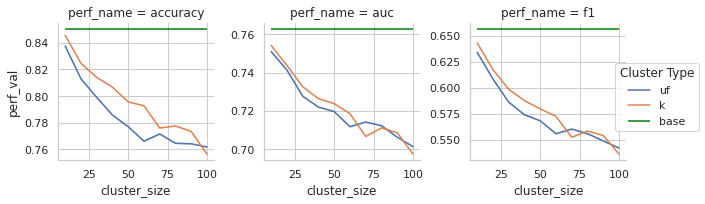

In [145]:
g = sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='perf_name')
g.map(sns.lineplot, "cluster_size", "perf_val")

for m, ax in zip(melt_df[melt_df.cluster_type.isnull() & melt_df.epsilon.isnull()]
                 .groupby('perf_name').perf_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=10, xmax=100, colors='green', label='base')
    
plt.legend(title='Cluster Type', loc='upper right', bbox_to_anchor=(1.5, 0.75))

In [171]:
df.cluster_type.value_counts(dropna=False)

uf      2200
k       2200
none       5
Name: cluster_type, dtype: int64

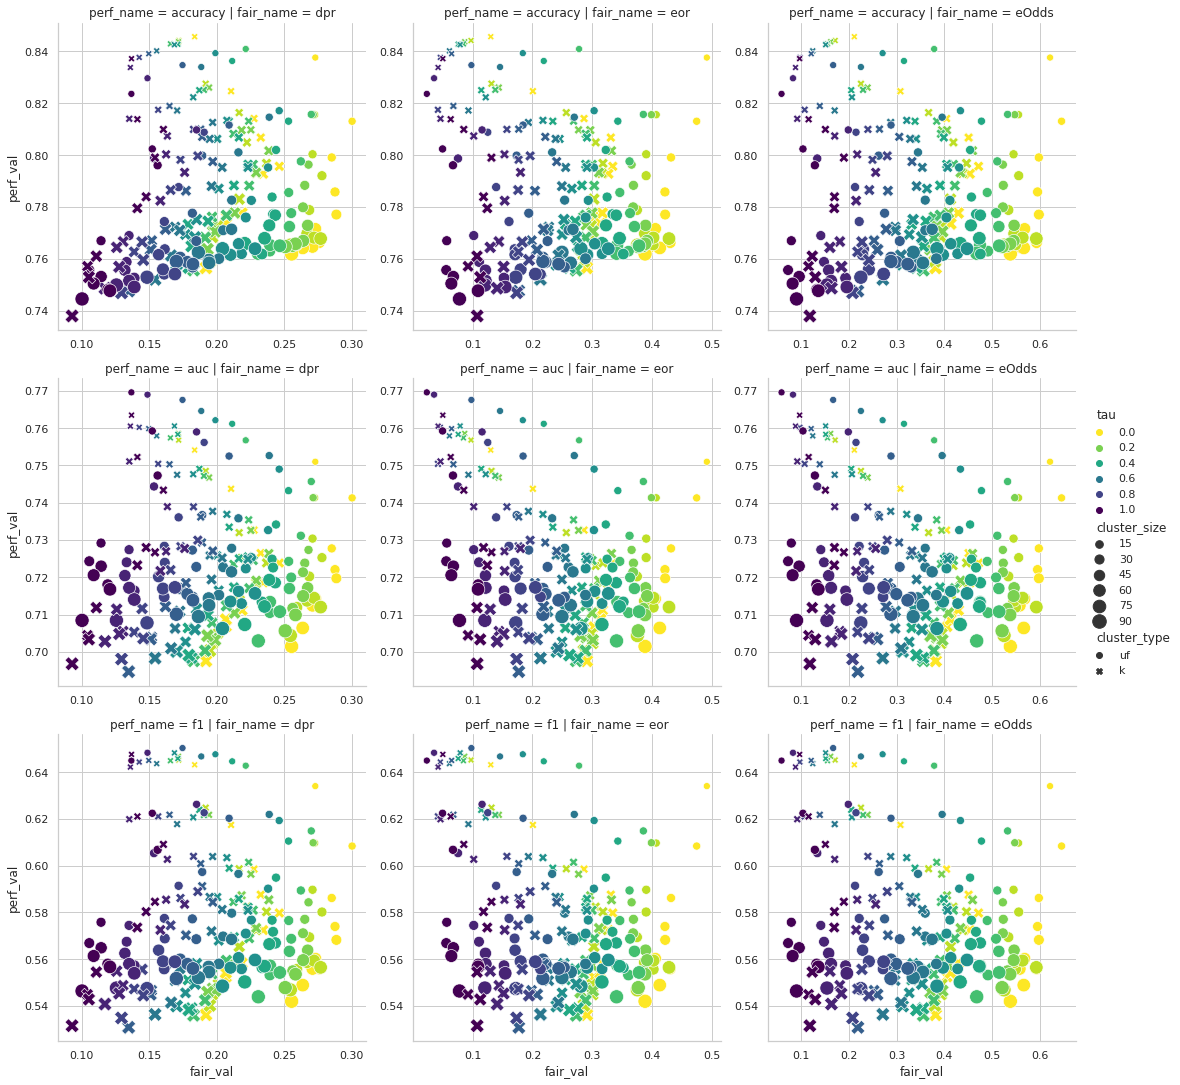

In [210]:
sns.relplot(
    data=melt_df[melt_df.epsilon.isnull()
                 & (melt_df.micro_agg == 1)
                 & (melt_df.neg_corr == 0)],
    x="fair_val", y="perf_val", col='fair_name', row='perf_name',
    hue="tau", size='cluster_size', style="cluster_type", sizes=(50,200), palette="viridis_r",
    facet_kws={'sharey': False, 'sharex': False}
)

In [163]:
melt_df.head()

,k,u,f,tau,neg_corr,micro_agg,epsilon,perf_name,perf_val,fair_name,fair_val,cluster_size,cluster_type
0,NaN,3.0,7.0,0.0,0.0,0.0,NaN,accuracy,0.850711,dpr,0.185789,10.0,uf
1,NaN,3.0,7.0,0.0,0.0,1.0,NaN,accuracy,0.837628,dpr,0.272914,10.0,uf
2,NaN,3.0,7.0,0.0,1.0,0.0,NaN,accuracy,0.850711,dpr,0.185789,10.0,uf
3,NaN,3.0,7.0,0.0,1.0,1.0,NaN,accuracy,0.837628,dpr,0.272914,10.0,uf
4,NaN,7.0,13.0,0.0,0.0,0.0,NaN,accuracy,0.850588,dpr,0.173952,20.0,uf


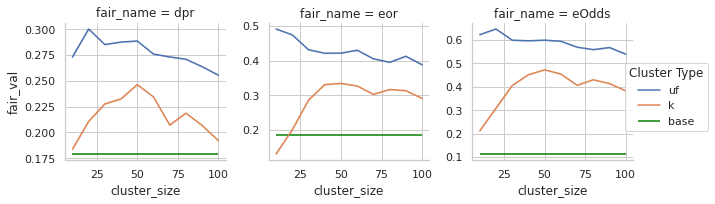

In [160]:
g = (sns.FacetGrid(data=melt_df[melt_df.epsilon.isnull()
                    & (melt_df.tau == 0)
                    & (melt_df.micro_agg == 1)],
            hue="cluster_type", sharey=False,
            col='fair_name')
     .map(sns.lineplot, "cluster_size", "fair_val")
    )

for m,ax in zip(melt_df[melt_df.cluster_type.isnull() & melt_df.epsilon.isnull()]
                .groupby('fair_name').fair_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=10, xmax=100, colors='green', label='base')
    
plt.legend(title='Cluster Type', loc='upper right', bbox_to_anchor=(1.5, 0.75))

#### DP Experiments

In [264]:
# dsets = ['income', 'compas', 'german']

# perf = ['accuracy', 'auc', 'f1']
# fair = ['dpr', 'eor', 'eOdds']
# params = ['e', 'fold']
# m_perf = ['perf_name', 'perf_val']

# for d in dsets:
#     melt_df = pd.melt(dp_df, id_vars=fair+params, value_vars=perf,
#                       var_name='perf_name', value_name='perf_val')
#     melt_df = pd.melt(melt_df, id_vars=params+m_perf, value_vars=fair,
#                       var_name='fair_name', value_name='fair_val')
#     melt_df.rename(columns={'e': 'epsilon'}, inplace=True)
#     melt_df.to_csv(d + '_experiment_DP_melt.csv', index=False)

In [193]:
melt_df = pd.read_csv('income_experiment_DP_melt.csv')

melt_cat = melt_df.copy()
melt_cat.epsilon.replace({np.nan:'base'}, inplace=True)
melt_cat.epsilon = pd.Categorical(melt_cat.epsilon, ordered=True,
                                  categories=[0.001, 0.003, 0.01, 0.032, 0.1,
                                              0.316, 1.0, 3.162, 10, 'base'])

df = pd.read_csv('income_DP_Experiment_all.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.rename(columns={'e':'epsilon'}, inplace=True)

df_cat = df.copy()
df_cat.epsilon.replace({np.nan:'base'}, inplace=True)
df_cat.epsilon = pd.Categorical(df_cat.epsilon, ordered=True,
                                categories=[0.001, 0.003, 0.01, 0.032, 0.1,
                                            0.316, 1.0, 3.162, 10, 'base'])

In [194]:
melt_cat.head()

,epsilon,fold,perf_name,perf_val,fair_name,fair_val
0,base,0,accuracy,0.82865,dpr,0.186974
1,base,0,accuracy,0.82865,dpr,0.186974
2,base,0,accuracy,0.82865,dpr,0.186974
3,base,0,accuracy,0.82865,dpr,0.186974
4,base,0,accuracy,0.82865,dpr,0.186974


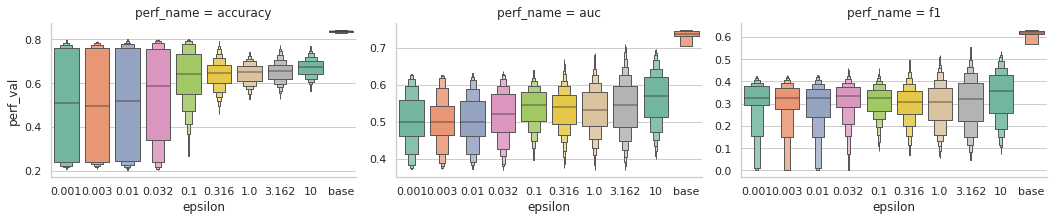

In [195]:
sns.set_theme(style="whitegrid")
g = sns.catplot(x="epsilon", y="perf_val", col="perf_name",
                data=melt_cat, kind="boxen",
                height=3, aspect=1.618, sharey=False,
                showfliers=False, palette="Set2");

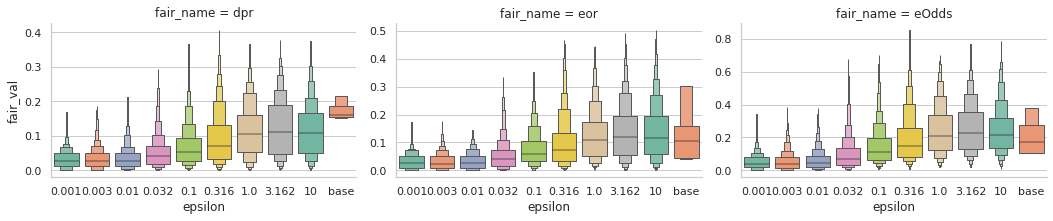

In [196]:
g = sns.catplot(x="epsilon", y="fair_val", col="fair_name",
                data=melt_cat, kind="boxen",
                height=3, aspect=1.618, sharey=False,
                showfliers=False, palette='Set2');

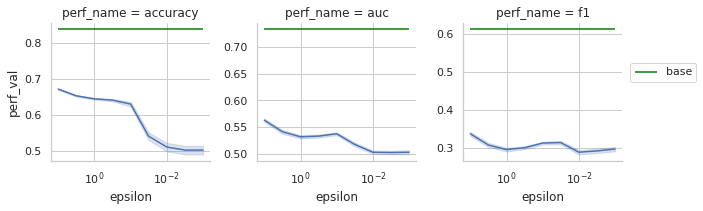

In [66]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='perf_name')
     .map(sns.lineplot, "epsilon", "perf_val")
     .set(xscale = 'log')
    )

for m,ax in zip(melt_df[melt_df.epsilon.isnull()]
                .groupby('perf_name').perf_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=0.001, xmax=10, colors='green', label='base')

plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.75))

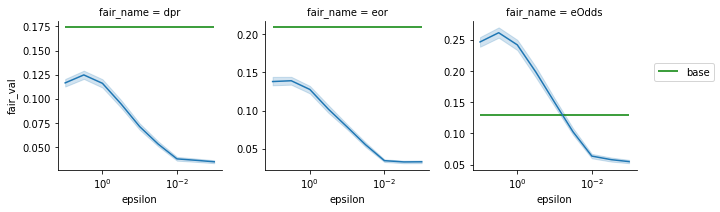

In [271]:
g = (sns.FacetGrid(data=melt_df, sharey=False, col='fair_name', col_wrap=3)
     .map(sns.lineplot, "epsilon", "fair_val")
     .set(xscale = 'log')
    )

for m,ax in zip(melt_df[melt_df.epsilon.isnull()]
                .groupby('fair_name').fair_val.mean(), g.axes.ravel()):
    ax.hlines(m, xmin=0.001, xmax=10, colors='green', label='base')

plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 0.75))

In [197]:
import math

means = df_cat.groupby(['epsilon']).mean()
means = means.reset_index()

perf = ['accuracy', 'auc', 'f1']
fair = ['dpr', 'eor', 'eOdds']
params = ['epsilon', 'fold']
m_perf = ['perf_name', 'perf_val']

melt_means = pd.melt(means, id_vars=fair+params, value_vars=perf,
                     var_name='perf_name', value_name='perf_val')
melt_means = pd.melt(melt_means, id_vars=params+m_perf, value_vars=fair,
                     var_name='fair_name', value_name='fair_val')

In [198]:
means

,epsilon,accuracy,f1,precision,recall,auc,dpr,eor,eOdds,fold
0,0.001,0.502641,0.296117,0.311756,0.503137,0.502779,0.034792,0.033143,0.054870,2
1,0.003,0.502193,0.291370,0.305340,0.502249,0.502183,0.036279,0.032949,0.057980,2
2,0.01,0.510819,0.287837,0.316247,0.487132,0.502708,0.037799,0.034610,0.063695,2
3,0.032,0.541043,0.313125,0.349415,0.472278,0.517578,0.053164,0.055420,0.102652,2
4,0.1,0.629727,0.311903,0.355034,0.359571,0.537486,0.071218,0.078666,0.149770,2
5,0.316,0.640662,0.299516,0.294754,0.325481,0.533051,0.094698,0.101757,0.197986,2
6,1,0.644240,0.294682,0.280967,0.314630,0.531705,0.116089,0.127624,0.241744,2
7,3.162,0.652577,0.306657,0.291588,0.326402,0.541219,0.124782,0.139034,0.261181,2
8,10,0.671222,0.336216,0.322859,0.354244,0.563003,0.116528,0.137984,0.246437,2
9,base,0.836584,0.610984,0.716628,0.534772,0.733548,0.174027,0.129667,0.208739,2


<AxesSubplot:xlabel='dpr', ylabel='accuracy'>

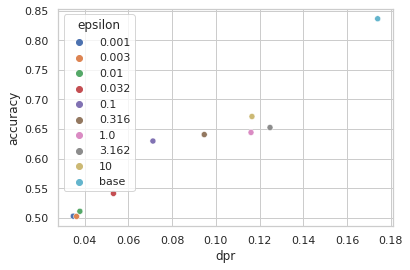

In [116]:
sns.scatterplot(data=means, x = 'dpr', y='accuracy', hue='epsilon')

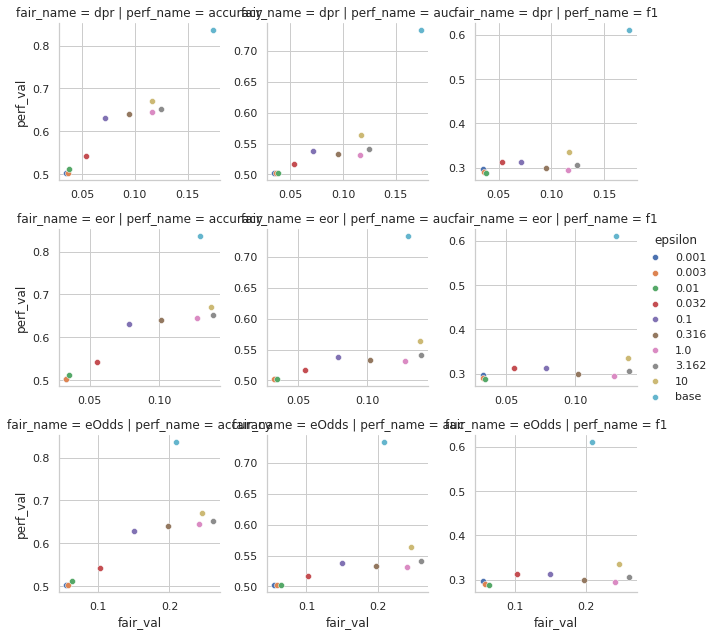

In [117]:
g = (sns.FacetGrid(data=melt_means, col='perf_name', row='fair_name',
                   hue='epsilon', sharex=False, sharey=False)
     .map(sns.scatterplot, "fair_val", "perf_val")
     .add_legend()
    )